# Anwendung digitaler Filter

In dieser Übung soll das Anwenden, und Charakterisieren, von digitalen Filtern geübt werden. Es werden angewendet:

* Hochpass
* Tiefpass
* Bandpass

## Imports

Im Folgenden werden einige Module importiert, die wir später brauchen

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.signal as signal

## Das Testsignal

Wir brauchen ein Testsignal, das wir Filtern können


Text(0, 0.5, 'Signal [V]')

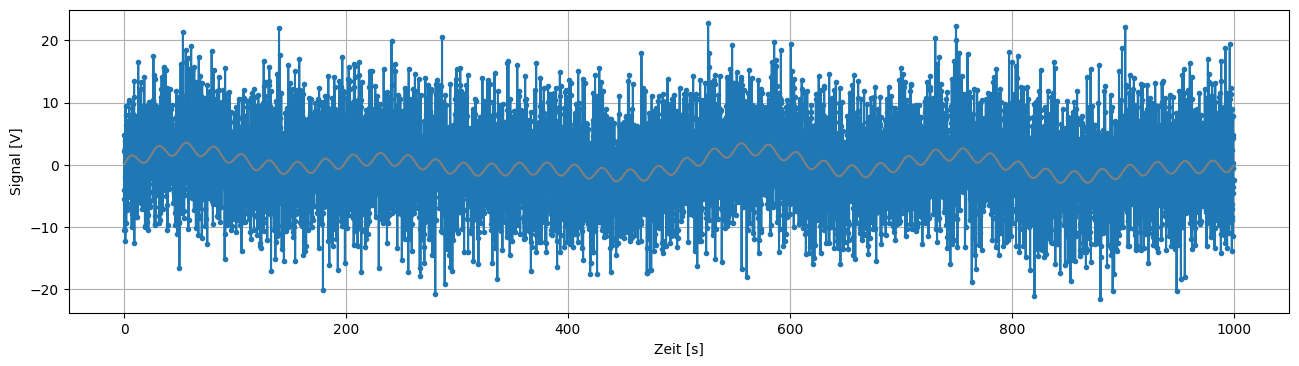

In [97]:
times = np.arange(0, 1000, 0.1)
signal_clean = np.sin(
    times / 175 * 2 * np.pi
) * 1 + np.sin(
    times / 240 * 2 * np.pi
) * 1 + np.sin(
    times / 500 * 2 * np.pi
) * 1 + np.sin(
    times / 25 * 2 * np.pi
) * 1.0

signal_noise = signal_clean + np.random.normal(scale=6, size=10000)

fig, ax = plt.subplots(figsize=(40 / 2.54, 10 / 2.54))

ax.plot(
    times,
    signal_noise,
    '.-'
)
ax.plot(
    times,
    signal_clean,
    color='gray',
)
ax.grid()
ax.set_xlabel('Zeit [s]')
ax.set_ylabel('Signal [V]')

# Spektralanalyse

Wir benutzen hier eine Lomb-Scargle-Analyse, welche primär für irregulär-gesampelte Zeitreihen gedacht ist (die FFT wird für reguläre Zeitreihen wesentlich schneller sein)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html

Text(0, 0.5, 'Normalized amplitude')

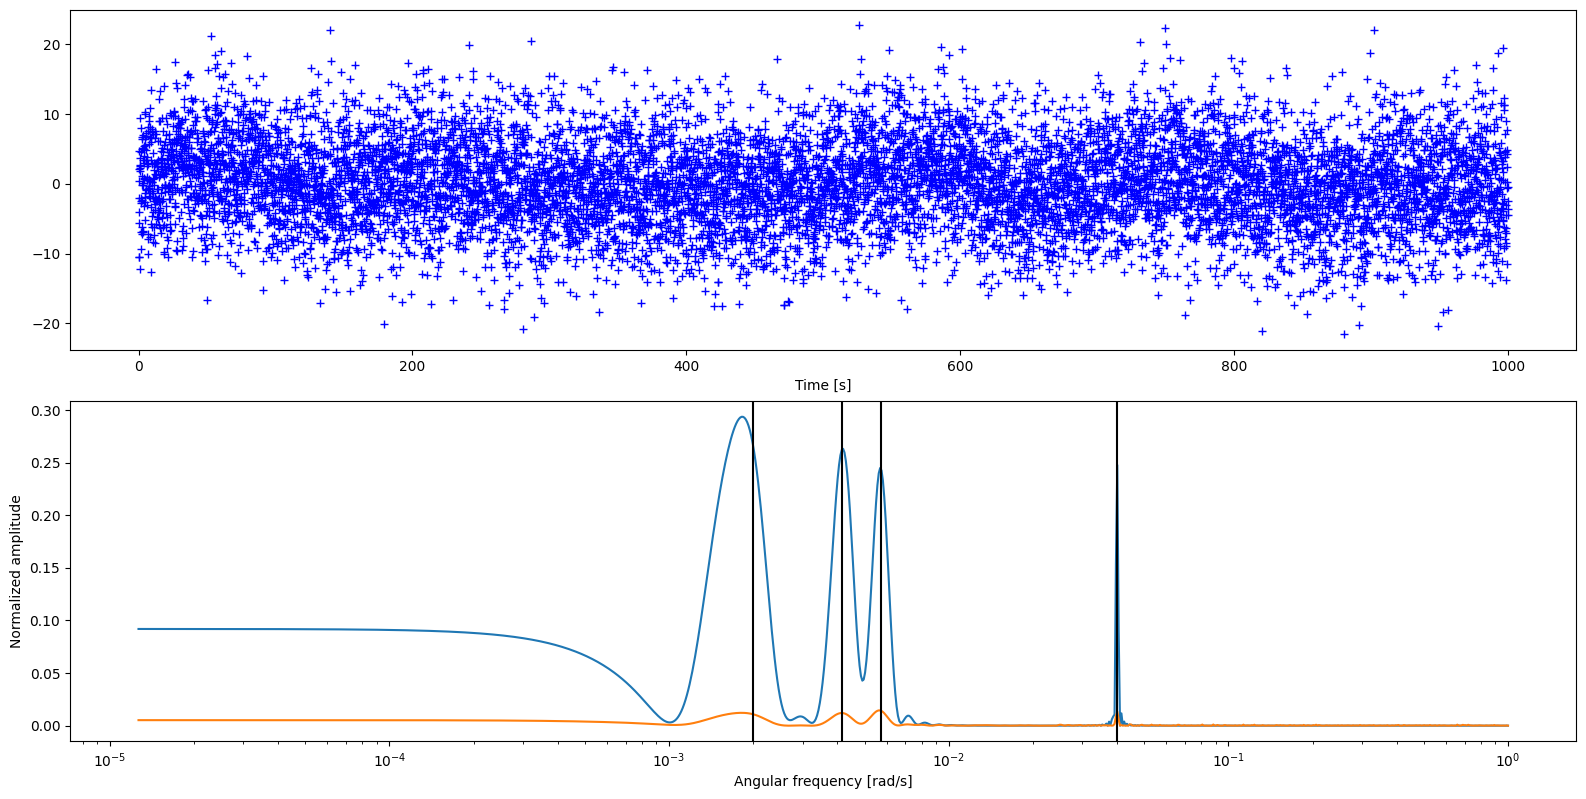

In [98]:
# Number of frequencies
nout = 1000
# Frequencies to check [rad / s]
# note: translate to Hz by multiplying with 2 * np.pi
# w = np.linspace(1 / 1000 / (2 * np.pi), np.pi * 2, nout)
w = np.logspace(np.log10(1 / 2000 / (2 * np.pi)), np.log10(np.pi * 2), nout)

pgram = signal.lombscargle(times, signal_clean, w, normalize=True)
pgram_noise = signal.lombscargle(times, signal_noise, w, normalize=True)

fig, (ax_t, ax_w) = plt.subplots(2, 1, constrained_layout=True, figsize=(40 / 2.54, 20 / 2.54))

ax_t.plot(times, signal_noise, 'b+')

ax_t.set_xlabel('Time [s]')
ax_w.plot(w / (2 * np.pi), pgram)
ax_w.plot(w / (2 * np.pi), pgram_noise)
ax_w.axvline(1 / 25, color='k')
ax_w.axvline(1 / 175, color='k')
ax_w.axvline(1 / 500, color='k')
ax_w.axvline(1 / 240, color='k')

ax_w.set_xscale('log')
ax_w.set_xlabel('Frequency [Hz])

ax_w.set_ylabel('Normalized amplitude')

# Der digitale Tiefpass

Wir erstellen einen digitalen Butterworth-Filter

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter

Nyquist frequency: 5.0


Text(0, 0.5, 'Filter Amplitude [dB]')

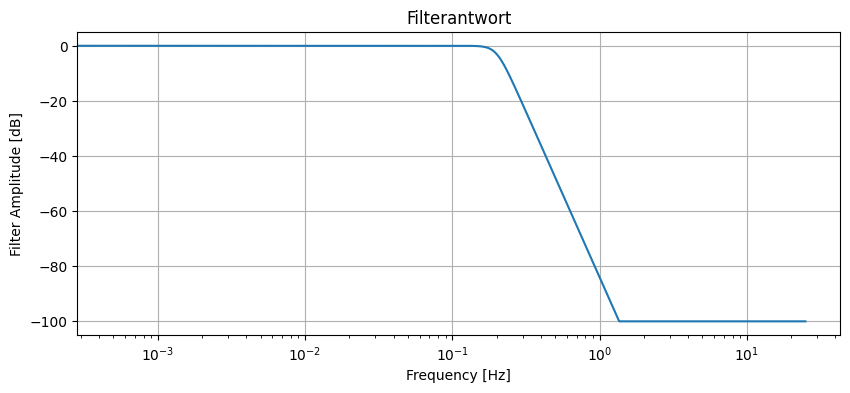

In [101]:
order = 6
# We sample with 1 Hz
fs = 1 / 0.1

nyquist = fs / 2
print('Nyquist frequency:', nyquist)

# [Hz]
threshold_frequency = 1 / 5

# normalize with Nyquist frequency
threshold_norm = threshold_frequency / nyquist

filter_pars = signal.butter(order, threshold_norm, btype="lowpass", output='sos', fs=fs)

w, h = signal.sosfreqz(filter_pars, fs=fs, worN=512*100)
db = 20*np.log10(np.maximum(np.abs(h), 1e-5))

fig, ax = plt.subplots(figsize=(25 / 2.54, 10 / 2.54))
# note: We need to convert back to [Hz]
ax.plot(w * nyquist, db)
ax.set_title('Filterantwort')
ax.set_xscale('log')
ax.grid()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Filter Amplitude [dB]')

Text(0, 0.5, 'Gefiltertes/Original- Signal [V]')

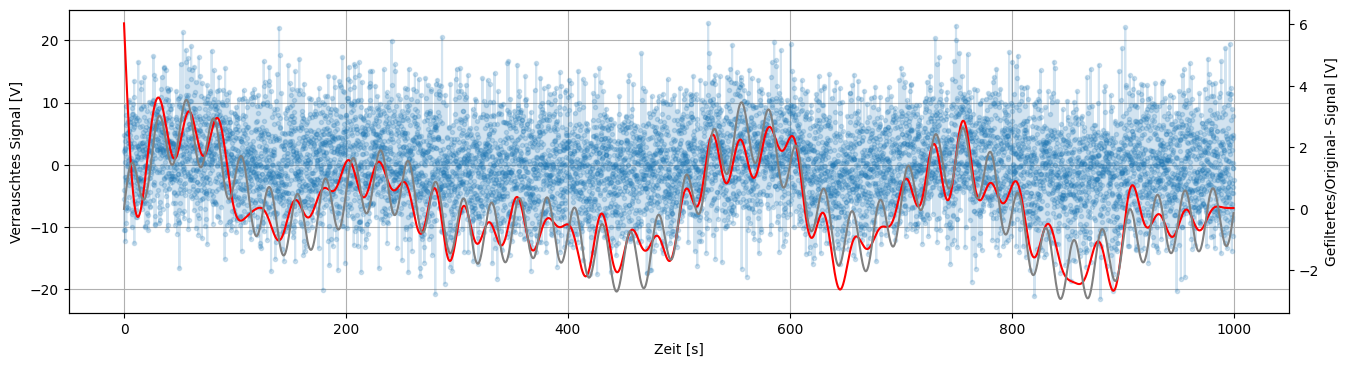

In [100]:
signal_filtered = signal.sosfiltfilt(filter_pars, signal_noise)
fig, ax = plt.subplots(figsize=(40 / 2.54, 10 / 2.54))

ax.plot(
    times,
    signal_noise,
    '.-',
    alpha=0.2,
)
ax2 = ax.twinx()
ax2.plot(
    times,
    signal_filtered,
    color='red',
)
ax2.plot(
    times,
    signal_clean,
    color='gray',
)
ax.grid()
ax.set_xlabel('Zeit [s]')
ax.set_ylabel('Verrauschtes Signal [V]')
ax2.set_ylabel('Gefiltertes/Original- Signal [V]')

# Aufgaben

* Erstellen Sie einen Hochpass und einen Bandpass. Trennen Sie so Signale von den Rauschkomponenten
* Analysieren Sie die diversen Signale mittels der FFT (scipy.signal.rfft und scipy.signal.rfftfreq)
* Ändern Sie das Originalsignal und fügen Sie sehr langwellige Signale hinzu (Periodenlänge größer als Signallänge). Welche Konsequenzen hat das für die Spektralanalyse?